<a href="https://colab.research.google.com/github/JulverRMP/Project02_Predictive-Maintenance/blob/main/Proyecto_2_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tu tarea para esta semana es comenzar a limpiar y explorar los datos que seleccionaste la semana pasada. Asegúrate de verificar la calidad de los datos: ¿necesitas lidiar con los valores faltantes? ¿Hay valores atípicos? Etc. También comienza a explorar tus datos: busca tendencias, crea visualizaciones, etc.



Fuente de la data:  

AI4I 2020 Predictive Maintenance Dataset. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5HS5C.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/BOOTCAMP-DATA_ANALYTICS/PROYECTO/Mantenimiento Predictivo/machine failure.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## Inspección y Limpieza de la data

Se verifica si hay datos duplicados con el método duplicate

In [6]:
df.duplicated().sum()

0

Segun el metodo .info() no se encuentran valores nulos en la data.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


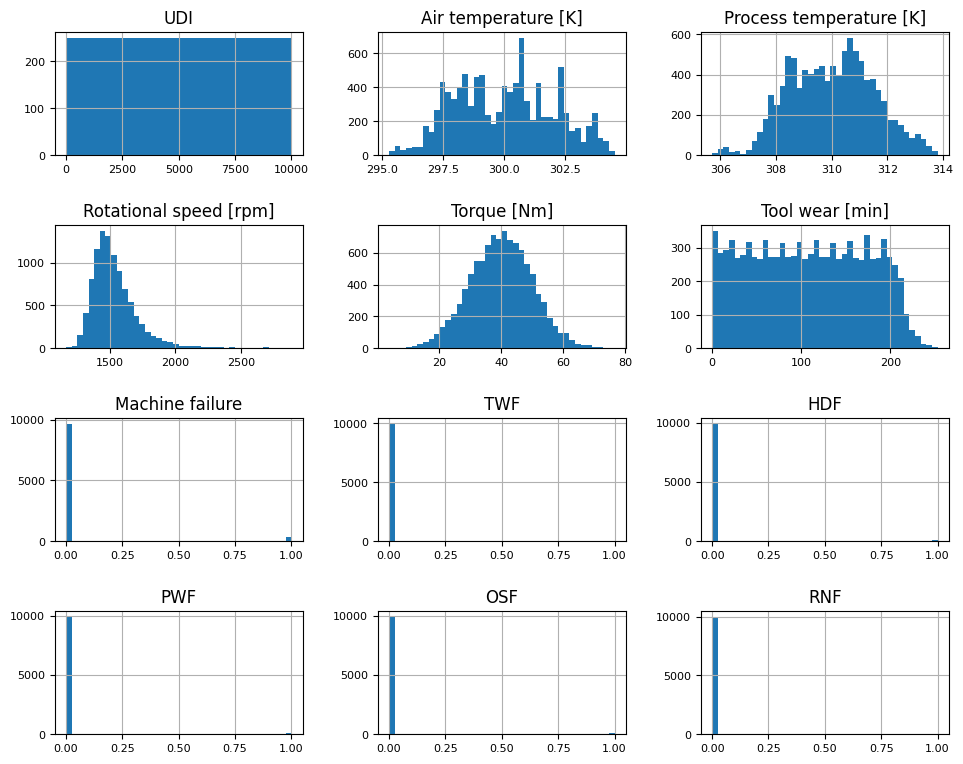

In [12]:
df.hist(bins=40, figsize=(10, 8), xlabelsize='8', ylabelsize='8')
plt.tight_layout(pad=2.0)
plt.show()

Hay caracteristicas que se encuentran sesgadas, pero la mayoria tiene una distribución normal

## OUTLIERS

In [22]:
listn1=['Rotational speed [rpm]']

In [23]:
import plotly.express as px
from plotly.subplots import make_subplots

columns = listn1

fig = make_subplots(rows=1, cols=len(columns), subplot_titles=columns)

for i, column in enumerate(columns, start=1):
    fig.add_trace(px.box(df, y=column,points='all').data[0], row=1, col=i)

fig.update_layout(title={'text': 'Diagramas de Cajas', 'x':0.5, 'font': {'size': 40}},showlegend=False)
fig.show()

In [24]:
df=df[~((df['Rotational speed [rpm]'] > 2240))].reset_index(drop='index')

In [26]:
import plotly.express as px
from plotly.subplots import make_subplots

columns = listn1

fig = make_subplots(rows=1, cols=len(columns), subplot_titles=columns)

for i, column in enumerate(columns, start=1):
    fig.add_trace(px.box(df, y=column,points='all').data[0], row=1, col=i)

fig.update_layout(title={'text': 'Diagramas de Cajas_Ajuste', 'x':0.5, 'font': {'size': 40}},showlegend=False)
fig.show()

In [27]:
df.shape

(9919, 14)

In [28]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Se reemplazara la columna 'UDI' en el indice.

In [29]:
df.set_index('UDI', inplace=True)

# EDA

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],9919.0,300.003609,1.999480,295.3,298.3,300.1,301.5,304.5
Process temperature [K],9919.0,310.005404,1.483019,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],9919.0,1531.097490,157.661325,1168.0,1422.0,1502.0,1609.0,2240.0
Torque [Nm],9919.0,40.205716,9.706323,15.3,33.4,40.2,46.8,76.6
Tool wear [min],9919.0,107.968646,63.628414,0.0,53.0,108.0,162.0,253.0
Machine failure,9919.0,0.031052,0.173466,0.0,0.0,0.0,0.0,1.0
TWF,9919.0,0.004537,0.067206,0.0,0.0,0.0,0.0,1.0
HDF,9919.0,0.011594,0.107054,0.0,0.0,0.0,0.0,1.0
PWF,9919.0,0.006553,0.080689,0.0,0.0,0.0,0.0,1.0
OSF,9919.0,0.009880,0.098911,0.0,0.0,0.0,0.0,1.0


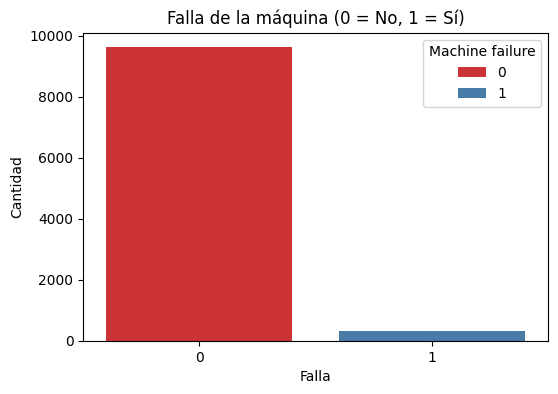

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=df, hue='Machine failure', palette='Set1')
plt.title('Falla de la máquina (0 = No, 1 = Sí)')
plt.xlabel('Falla')
plt.ylabel('Cantidad')
plt.show()

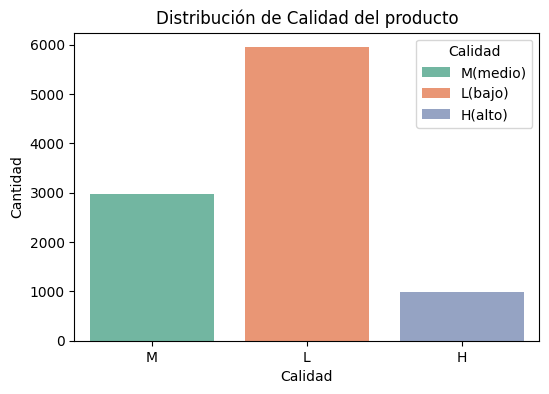

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df,hue='Type', palette='Set2')
plt.title('Distribución de Calidad del producto')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')

# Creamos la leyenda utilizando las etiquetas obtenidas
plt.legend(['M(medio)','L(bajo)','H(alto)'], title='Calidad')
plt.show()

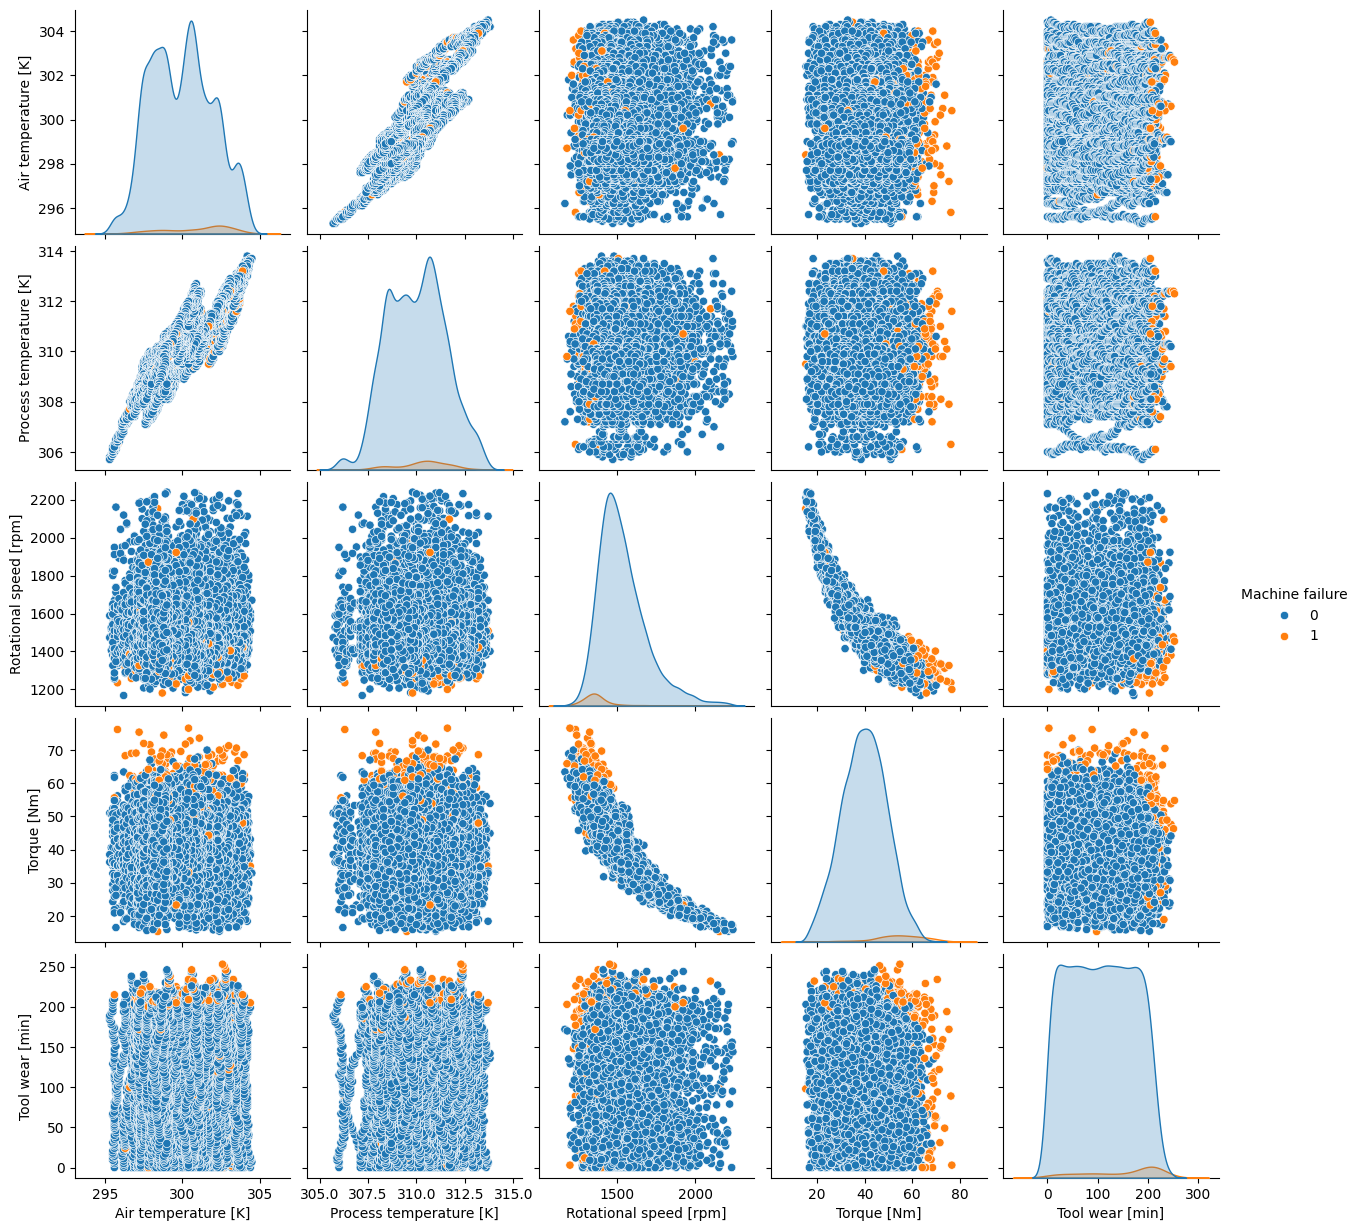

In [47]:
sns.pairplot(df.drop(['TWF',	'HDF',	'PWF',	'OSF'	,'RNF'], axis=1), hue='Machine failure')
plt.show()

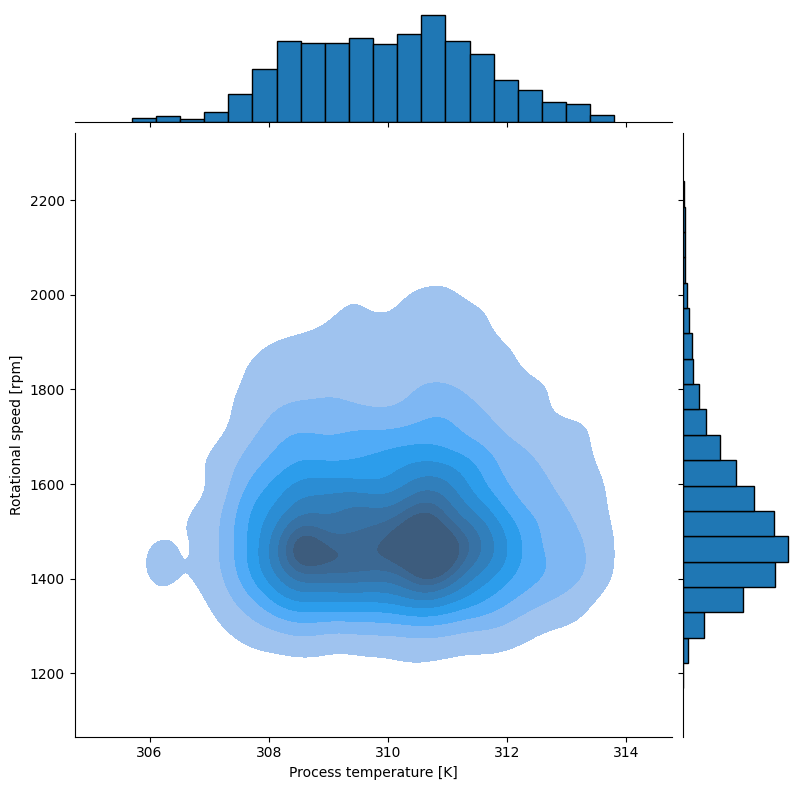

In [52]:
g = sns.JointGrid(data = df, height = 8, x = "Process temperature [K]", y = "Rotational speed [rpm]", space = 0.1)
g.plot_joint(sns.kdeplot,fill = True)
g.plot_marginals(sns.histplot,  alpha = 1, bins = 20);

In [59]:
import plotly.express as px

fig = px.scatter(df, x="Process temperature [K]", y="Rotational speed [rpm]",size="Machine failure", color="Type",
           hover_name="Type", size_max=25,opacity = 0.5,title="Velocidad rotacional [rpm] y Temperatura de proceso [K]")
fig.show()

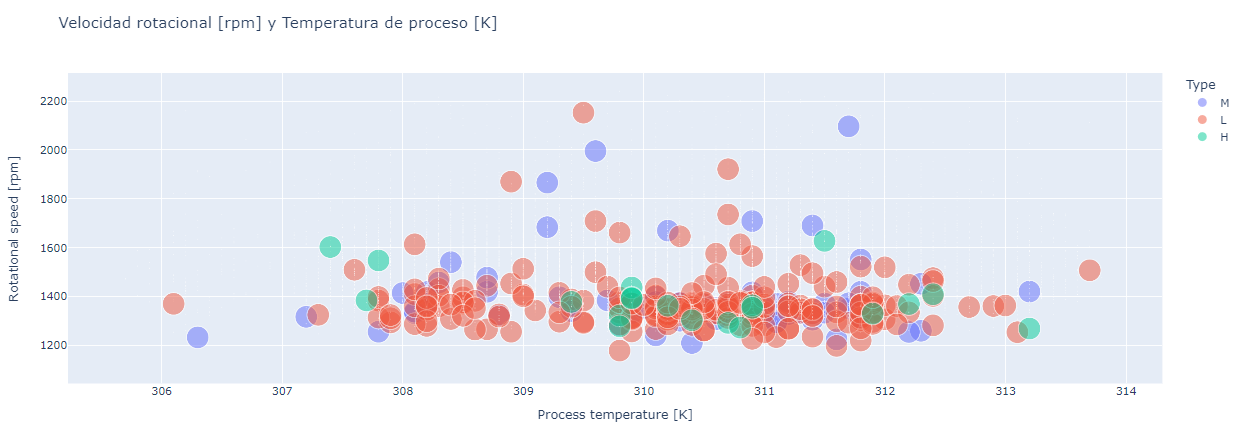

Matriz de correlación

In [62]:
df2=df.drop(columns=['Product ID', 'Type',])

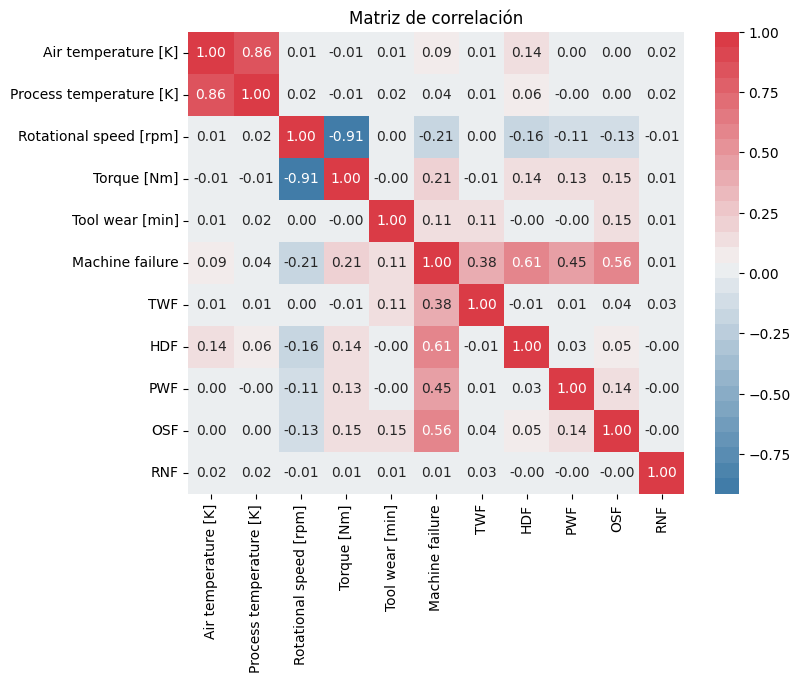

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(method='spearman'), annot=True, cmap = sns.diverging_palette(240, 10, n=30), fmt=".2f")
plt.title('Matriz de correlación')
plt.show()